__Author__: Shaw Lu
* Parse vocabulart into syllables.
* Prepare syllables into trainable format, to be trained by word2vec.
* The following [repo](https://github.com/cainesap/syllabify) was used to breakword into syllables, with minor modification.
* Stress of vowels was ignored.

In [1]:
from syllabify import *
import numpy as np
import json

In [2]:
# sanity check
syllable = list(generate("documentary"))
for syll in syllable:
    for s in syll:
        print(s)

daa
kyah
mehn
ter
iy


In [7]:
source = open('datasetSentencesOrig.txt', 'r')
for i, line in enumerate(source): continue
num_lines = i

In [9]:
source = open('datasetSentencesOrig.txt', 'r')

syl_counter = {}
word_set = set()
missed = {}

word_count = []
syl_count = []
syl_sents = []
orig_sents = []
for i, line in enumerate(source):
    if i == 0: continue
    idx, sen = line.split("\t")
    orig_sents.append(sen)
    syl_sent = []
    for word in sen.split():
        if not word: continue
        word = word.lower()
        word_set.add(word)
        syllable = generate(word.rstrip())
        raw = get_raw(word.rstrip())
        if syllable:
            try:
                for syll in syllable:
                    for s in syll:
                        syl_counter[str(s)] = syl_counter.get(str(s), 0) + 1
                        syl_sent.append(str(s))
            except:
                syl_sent.append(word)
                missed[word] = missed.get(word, 0) + 1
        else:
            syl_sent.append(word)
                
        word_count.append(len(word_set))
        syl_count.append(len(syl_counter))
    syl_sents.append([idx, " ".join(syl_sent)])
    
    if i % 10 == 0: print("sylabify %.2f%%"%(100 * i / num_lines), end="\r")

In [22]:
len(orig_sents)

11855

In [20]:
sent_idx = 12
syl_sents[sent_idx]

['13',
 'waht rih liy ser pray zihz ah bawt wisegirls ihz ihts low-key kwaa lah tiy ahnd jheh nyah wahn tehn der nahs .']

In [21]:
orig_sents[sent_idx]

'What really surprises about Wisegirls is its low-key quality and genuine tenderness .\n'

In [40]:
with open('datasetSentences.txt', 'w') as file:
    file.write("sentence_index	sentence\n")
    for syl_sent in syl_sents:
        file.write("\t".join(syl_sent) + "\n")

In [41]:
# original case
# Word count: 21701
# Syllabus count: 5524
# Compression rate: 25.46%

# lowercase
# Vocab size: 19538
# Syllable size: 5524
# Compression rate: 28.27%
# Missed rate: 0.27%
    
print("Vocab size: %i"%len(word_set))
print("Syllable size: %i"%len(syl_counter))
print("Compression rate: %.2f%%"%(100 * len(syl_counter) / len(word_set)))
print("Missed rate: %.2f%%"%(100 * sum(missed.values()) / len(word_set)))

Vocab size: 19538
Syllable size: 5524
Compression rate: 28.27%
Missed rate: 0.27%


In [42]:
missed

{'branched': 1,
 'congratulate': 1,
 'drenched': 1,
 'engross': 1,
 'engrossing': 33,
 'ingredient': 1,
 'ingredients': 11,
 'punched': 1,
 'self-congratulation': 2}

In [43]:
from matplotlib import pyplot as plt

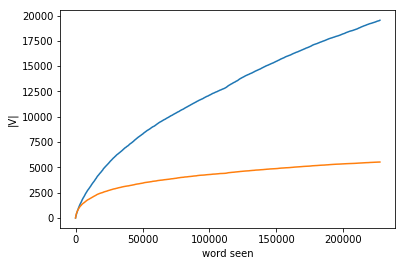

In [44]:
plt.plot(word_count)
plt.xlabel("word seen")
plt.ylabel("|V|")
plt.plot(syl_count)
plt.savefig("size.png")

##### Most frequent syllables

In [45]:
counter_list = [[key, val] for key, val in syl_counter.items()]

In [46]:
counter_list.sort(key=lambda x : -x[1])

In [47]:
"KAA" in syl_counter

False

In [48]:
[x[0] for x in counter_list[:20]]

['ah',
 'dhah',
 'ahnd',
 'ahv',
 'tuw',
 'ihn',
 'liy',
 'ihz',
 'iht',
 'ehs',
 'riy',
 'dhaet',
 'faor',
 'ter',
 'aez',
 'dih',
 'ih',
 'mah',
 'shahn',
 'viy']

In [49]:
counter_list[-10:]

[['skwihn', 1],
 ['vowl', 1],
 ['ners', 1],
 ['grahnts', 1],
 ['boyl', 1],
 ['snihs', 1],
 ['smihr', 1],
 ['tuws', 1],
 ['priyk', 1],
 ['pihg', 1]]

##### Save trainable formats

In [50]:
with open('syllable_frequency.txt', 'w') as file:
    for syllable, count in counter_list:
        file.write("%s|%i\n"%(syllable, count))

In [51]:
with open('dictionary.txt', 'w') as file:
    for idx, (syllable, count) in enumerate(counter_list):
        file.write("%s|%i\n"%(syllable, idx))